### Imports

In [1]:
# Analysis and wrangling.
import pandas as pd
import numpy as np

# Graphics libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Loading data / brief analysis.

In [37]:
student_df = pd.read_csv('./data/challenge_MLE.csv', sep=';')
student_df.sample(3)

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,...,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo
11042,52,1-2022,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2bc2fb30-95f8-42ff-b29e-8babf90640ce,3dfb4eb6-2ccf-4c00-91b6-a0cabe1bfa4b,Reduced mission-critical attitude,286422CWL
116610,14,1-2022,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ded91bdd-7998-4502-b2cb-9b0081eb3464,d1ecb02f-5535-41ac-a0ee-9e620c3d84ca,Configurable human-resource challenge,614851WSA
47128,48,01-2022,10.0,NaN,NaN,NaN,192216.0,Actividad Práctica Integradora 4 [API4],1.643061e+09,1.646017e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,9058d92e-7977-45d5-a87b-04ae11500779,c15fb5d7-88cb-40be-9ce1-b8236193d46b,Organic background secured line,665061QFW


In [28]:
# Getting to know df.
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   particion           196124 non-null  int64         
 1   periodo             196124 non-null  object        
 2   nota_final_materia  196124 non-null  float64       
 3   fecha_mesa_epoch    7010 non-null    datetime64[ns]
 4   nombre_examen       7010 non-null    object        
 5   nota_parcial        7010 non-null    float64       
 6   assignment_id       26061 non-null   float64       
 7   ass_name            26061 non-null   object        
 8   ass_created_at      26061 non-null   float64       
 9   ass_due_at          26061 non-null   float64       
 10  ass_unlock_at       24760 non-null   float64       
 11  ass_lock_at         25979 non-null   float64       
 12  points_possible     26061 non-null   float64       
 13  ass_name_sub        24206 non

In [29]:
# Checking nulls.
pd.DataFrame([student_df.isnull().sum(), (student_df.isnull().sum() / student_df.shape[0] * 100).round(2)]).T

,0,1
particion,0.0,0.00
periodo,0.0,0.00
nota_final_materia,0.0,0.00
fecha_mesa_epoch,189114.0,96.43
nombre_examen,189114.0,96.43
nota_parcial,189114.0,96.43
assignment_id,170063.0,86.71
ass_name,170063.0,86.71
ass_created_at,170063.0,86.71
ass_due_at,170063.0,86.71


# Analyzing data.

<AxesSubplot: >

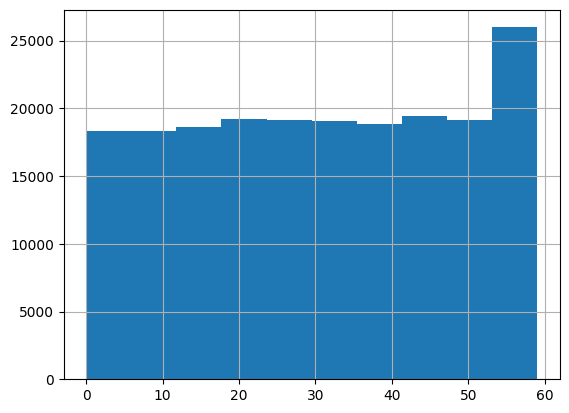

In [34]:
# Checking the time partition.
student_df['particion'].hist()

In [36]:
# Checking the time partition.
student_df['periodo'].value_counts()

1-2022     187854
01-2022      7730
2-2022        540
Name: periodo, dtype: int64

<AxesSubplot: >

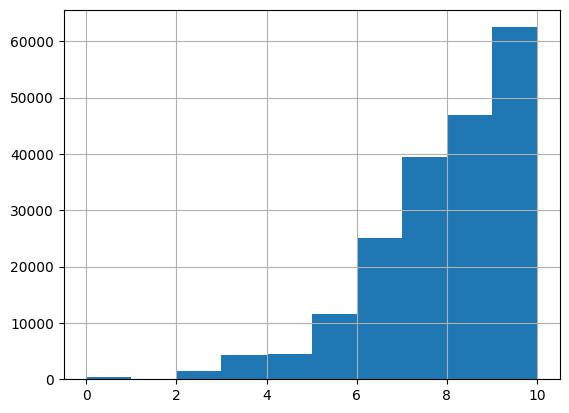

In [38]:
student_df['nota_final_materia'].hist()

In [40]:
student_df['user_uuid'].value_counts()

518e8c5f-6632-450b-bcee-518807ff2e9f    1017
ded91bdd-7998-4502-b2cb-9b0081eb3464     824
f2dbd20e-13f8-4d5c-b4ee-70b5ed837d5a     824
0f58fa3f-0015-4064-99d9-ad9cb96b8fe6     814
21056e82-1fe6-45a8-a059-a5a6387619c9     799
                                        ... 
59db8682-a866-4f35-97d1-fbebd7675088      60
8b4d4ea7-664d-473c-8f6c-280744e645d4      60
df99c926-9a5c-495a-803b-fe1c94743cbb      60
35bf6215-6f70-43f2-afd8-e668e5735347      60
ed4e3e5e-5c10-4187-91f7-82114442b119      60
Name: user_uuid, Length: 600, dtype: int64

In [41]:
student_df['course_uuid'].value_counts()

2b274b15-83bb-4629-941e-fdc573af4e0b    11439
c78af3b4-4574-4a82-8c41-45195ce43384    10341
12bb6bfa-8b01-46a8-8cc2-e0e84785fa1e     4555
0034afe6-e996-4c26-b0b9-24dbb9535465     3997
68005d22-90dc-42f6-b90a-409714481cbc     3537
                                        ...  
c7608367-bb39-4722-9270-c93058669c2b       60
c68a3c33-51e2-4dd0-9536-2288eca94fe5       60
132ed50b-ec8b-4ad1-973d-f02eab433a34       60
aef3ac91-4ee5-4f4e-a7cf-620094fa81dc       60
dc53bcc5-440d-4bab-93c7-a749c9eddd85       60
Name: course_uuid, Length: 582, dtype: int64

In [42]:
student_df['course_name'].value_counts()

Intuitive non-volatile ability                11439
Object-based leadingedge help-desk            10341
Face-to-face regional concept                  4555
Stand-alone upward-trending secured line       4262
Total radical adapter                          3537
                                              ...  
Monitored regional artificial intelligence       60
Grass-roots national middleware                  60
Multi-channeled homogeneous policy               60
Operative fresh-thinking knowledge user          60
Operative systematic help-desk                   60
Name: course_name, Length: 561, dtype: int64

In [43]:
student_df['legajo'].value_counts()

624097JCN    1017
614851WSA     824
694137GRI     824
303555JEN     814
220932BSH     799
             ... 
517004GYP      60
715923CNS      60
763896XAM      60
890983ESM      60
263794IKM      60
Name: legajo, Length: 601, dtype: int64

From this little analysis i got that the information in this data set is segregated in different levels. Each row is a unique interaction or activity.

So the goal will be to analyze the different variables and try to generate other useful variables from them.